In [30]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# read data file
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# print top 5 row of train_df

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# print top 5 rows of test_df
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
#describe train_df
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
# drop the unwanted columns from the train_df.
X_df = train_df.drop(['PassengerId','Name','Ticket'],axis=1)

# drop duplicates
X_df.drop_duplicates(inplace=True)

# describe X_df
X_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.759076,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
X_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [36]:
# find how many NaN values are present in each column
X_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Cabin       581
Embarked      2
dtype: int64

In [37]:
# Delete column Cabin as it has more than 50% data null
# Null Values in Embarked will be filled by most frequently used values among S, C, Q
# Null values in Age will be filled by the avg value present in Age column

X_df.drop(['Cabin'], axis=1, inplace=True)
X_df['Embarked'].fillna(value=X_df['Embarked'].value_counts().index[0], inplace=True)
X_df['Age'].fillna(value=X_df['Age'].mean(), inplace=True)

# again check for null values
X_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
col=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

for i in col:
    print(X_df[i].value_counts())
    print("*"*33)

0    461
1    323
Name: Survived, dtype: int64
*********************************
3    405
1    214
2    165
Name: Pclass, dtype: int64
*********************************
male      491
female    293
Name: Sex, dtype: int64
*********************************
0    517
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64
*********************************
0    580
1    114
2     75
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
*********************************
S    570
C    155
Q     59
Name: Embarked, dtype: int64
*********************************


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


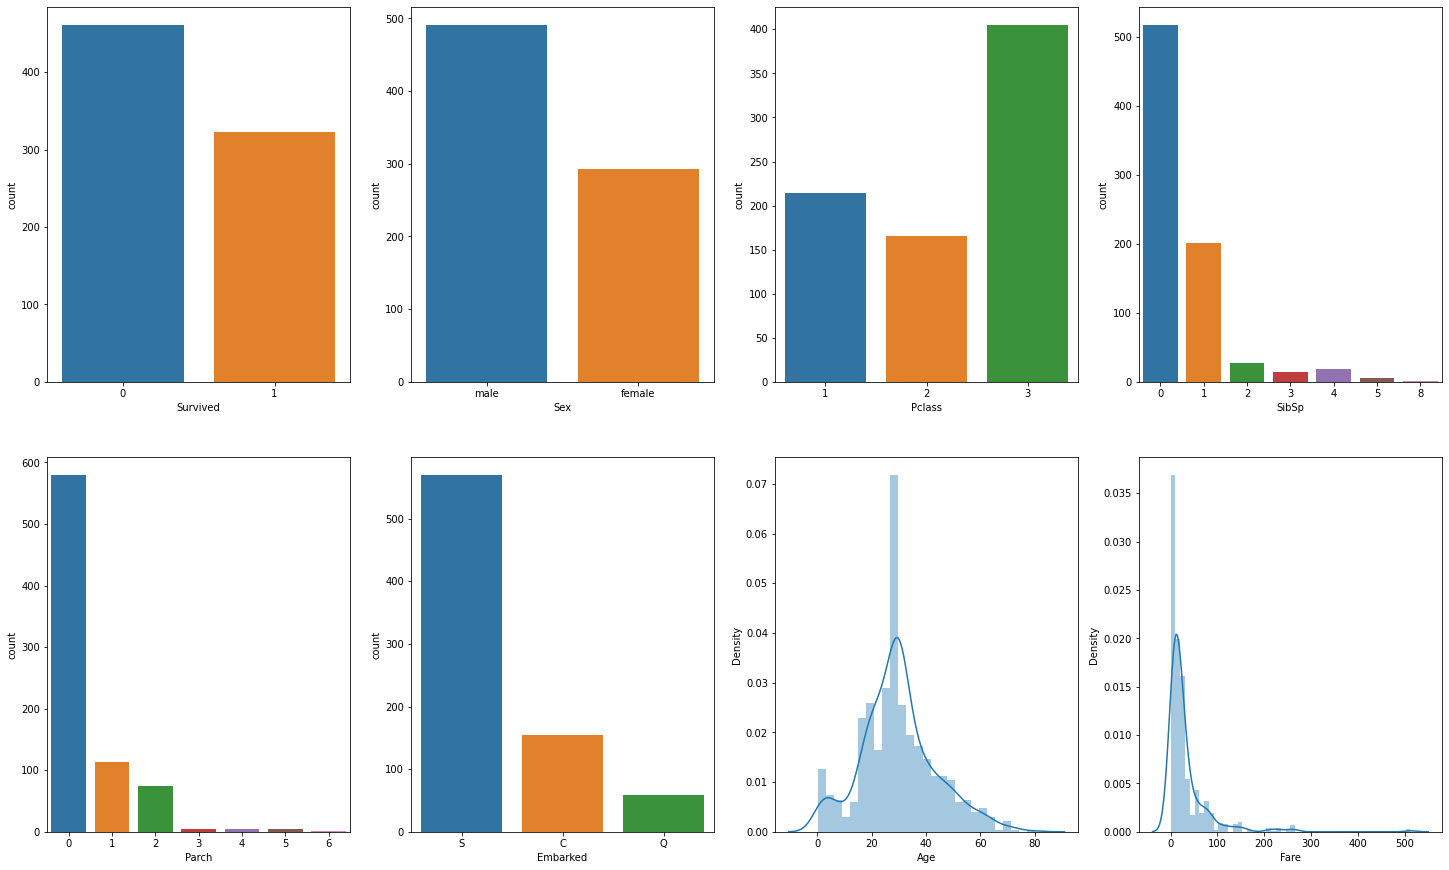

In [39]:
plt.figure(figsize=(25,40))
# Plotting graph for survived or not
plt.subplot(5,4,1)
sns.countplot(x='Survived', data=X_df)
# Plotting graph for number of male and female
plt.subplot(5,4,2)
sns.countplot(x='Sex', data=X_df)
# Plotting for Pclass
plt.subplot(5,4,3)
sns.countplot(x='Pclass', data=X_df)
# Plot for SibSp
plt.subplot(5,4,4)
sns.countplot(x='SibSp', data=X_df)
# Plot for Parch
plt.subplot(5,4,5)
sns.countplot(x='Parch', data=X_df)
# Plot for Embarked
plt.subplot(5,4,6)
sns.countplot(x='Embarked', data=X_df)
# Distribution for Age
plt.subplot(5,4,7)
sns.distplot(X_df.Age)
# Distribution for Fare
plt.subplot(5,4,8)
sns.distplot(train_df.Fare)

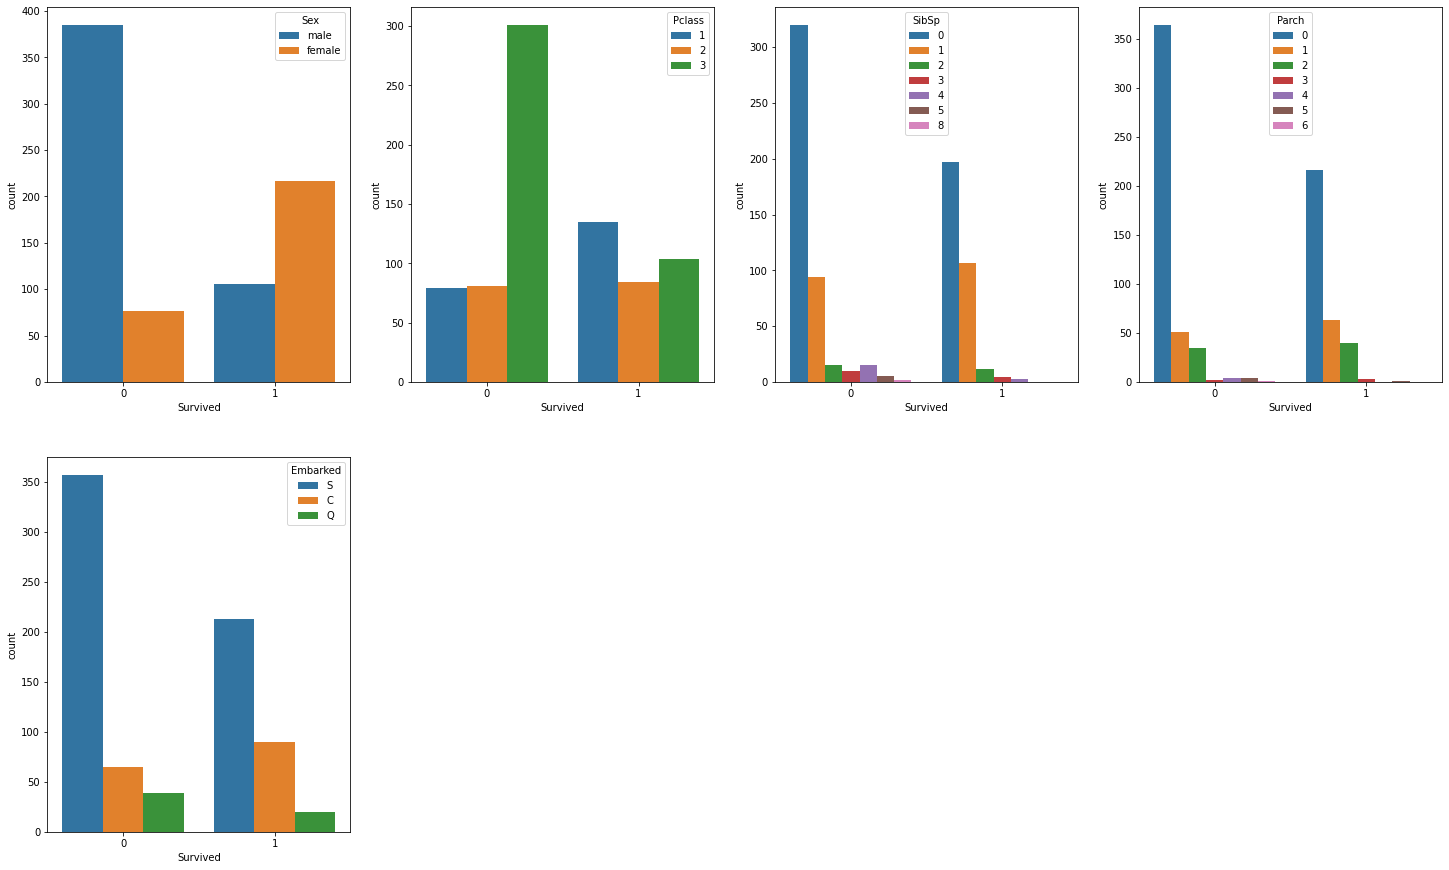

In [40]:
plt.figure(figsize=(25,40))
# Survived vs Sex
plt.subplot(5,4,1)
sns.countplot(x='Survived', hue='Sex', data=X_df)
# Survived vs Pclass
plt.subplot(5,4,2)
sns.countplot(x='Survived', hue='Pclass', data=X_df)
# Survived vs SibSp
plt.subplot(5,4,3)
sns.countplot(x='Survived', hue='SibSp', data=X_df)
# Survived vs Parch
plt.subplot(5,4,4)
sns.countplot(x='Survived', hue='Parch', data=X_df)
# Survived vs Embarked
plt.subplot(5,4,5)
sns.countplot(x='Survived', hue='Embarked', data=X_df)

In [41]:
# reducing number of categorical variables for SibSp and Parch
X_df['SibSp'] = [9 if i != 0 else i for i in X_df['SibSp']]
X_df['Parch'] = [7 if i != 0 else i for i in X_df['Parch'] ]

X_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,9,0,7.2500,S
1,1,1,female,38.000000,9,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,9,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,7,29.1250,Q
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.869351,9,7,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [42]:
# create dummy variables 
X_df = pd.get_dummies(X_df,columns=['Sex'],drop_first=True)
X_df = pd.get_dummies(X_df,columns=['SibSp'],drop_first=True)
X_df = pd.get_dummies(X_df,columns=['Parch'],drop_first=True)
X_df = pd.get_dummies(X_df,columns=['Embarked'],drop_first=True)
X_df = pd.get_dummies(X_df,columns=['Pclass'],drop_first=True)

X_df

,Survived,Age,Fare,Sex_male,SibSp_9,Parch_7,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.000000,7.2500,1,1,0,0,1,0,1
1,1,38.000000,71.2833,0,1,0,0,0,0,0
2,1,26.000000,7.9250,0,0,0,0,1,0,1
3,1,35.000000,53.1000,0,1,0,0,1,0,0
4,0,35.000000,8.0500,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.000000,29.1250,0,0,1,1,0,0,1
887,1,19.000000,30.0000,0,0,0,0,1,0,0
888,0,29.869351,23.4500,0,1,1,0,1,0,1
889,1,26.000000,30.0000,1,0,0,0,0,0,0


In [43]:
# split the data in X and y for training
X = X_df.drop(['Survived'],axis=1)
y = X_df['Survived']

In [44]:
# Min Max scaling
scaler = MinMaxScaler()
col_name = X.columns
X = pd.DataFrame(scaler.fit_transform(X), columns = col_name)

X

,Age,Fare,Sex_male,SibSp_9,Parch_7,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.271174,0.014151,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.472229,0.139136,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.434531,0.103644,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.434531,0.015713,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
779,0.484795,0.056848,0.0,0.0,1.0,1.0,0.0,0.0,1.0
780,0.233476,0.058556,0.0,0.0,0.0,0.0,1.0,0.0,0.0
781,0.370060,0.045771,0.0,1.0,1.0,0.0,1.0,0.0,1.0
782,0.321438,0.058556,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# processing test dataset same as the train dataset
# drop the unwanted columns from the train_df.
X_test = test_df.drop(['PassengerId','Name','Ticket'],axis=1)

# drop duplicates
X_test.drop_duplicates(inplace=True)

X_test.drop(['Cabin'], axis=1, inplace=True)
X_test['Embarked'].fillna(value=train_df['Embarked'].value_counts().index[0], inplace=True)
X_test['Age'].fillna(value=train_df['Age'].mean(), inplace=True)

X_test['SibSp'] = [9 if i != 0 else i for i in X_test['SibSp']]
X_test['Parch'] = [7 if i != 0 else i for i in X_test['Parch']]

X_test = pd.get_dummies(X_test,columns=['Sex'],drop_first=True)
X_test = pd.get_dummies(X_test,columns=['SibSp'],drop_first=True)
X_test = pd.get_dummies(X_test,columns=['Parch'],drop_first=True)
X_test = pd.get_dummies(X_test,columns=['Embarked'],drop_first=True)
X_test = pd.get_dummies(X_test,columns=['Pclass'],drop_first=True)

X_test = pd.DataFrame(scaler.transform(X_test), columns = col_name)
X_test

,Age,Fare,Sex_male,SibSp_9,Parch_7,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.428248,0.015282,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.585323,0.013663,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.773813,0.018909,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.334004,0.016908,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.271174,0.023984,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
379,0.459663,0.175668,0.0,1.0,0.0,1.0,0.0,0.0,0.0
380,0.346569,0.015176,0.0,0.0,0.0,0.0,1.0,0.0,1.0
381,0.484795,0.212559,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,0.478512,0.014151,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [61]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model_lr = LogisticRegression()
scores_lr = cross_val_score(model_lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

model_dt = DecisionTreeClassifier(random_state=0)
scores_dt = cross_val_score(model_dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

model_rf = RandomForestClassifier(n_estimators = 100, random_state=0)
scores_rf = cross_val_score(model_rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

model_svm = SVC()
scores_svm = cross_val_score(model_svm, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

model_nb = GaussianNB()
scores_nb = cross_val_score(model_nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

model_knn = KNeighborsClassifier(n_neighbors=28)
scores_knn = cross_val_score(model_knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [62]:
print('Logistic Regression: %s (%s)' %(scores_lr.mean(), scores_lr.max()))
print('Decision Tree: %s (%s)' %(scores_dt.mean(), scores_dt.max())) 
print('Random Forest: %s (%s)' %(scores_rf.mean(), scores_rf.max())) 
print('SVM: %s (%s)' %(scores_svm.mean(), scores_svm.max())) 
print('Navie Bayes: %s (%s)' %(scores_nb.mean(), scores_nb.max())) 
print('Knn: %s (%s)' %(scores_knn.mean(), scores_knn.max())) 

Logistic Regression: 0.7792437520285621 (0.8481012658227848)
Decision Tree: 0.7207075624797145 (0.7692307692307693)
Random Forest: 0.7589581304771178 (0.8461538461538461)
SVM: 0.7806718597857838 (0.8846153846153846)
Navie Bayes: 0.75 (0.8333333333333334)
Knn: 0.7768094774423888 (0.8589743589743589)
